# Selenium 개요

- BeautifulSopu 패키지만을 사용하여 크롤링을 할 경우, 모든 웹페이지의 데이터들을 가져오는 것은 아니다.
- 예를들어, 비동기적으로 뒤늦게 웹페이지의 정보를 업데이트하는 경우와 로그인이나 특정권한을 요구하는 웹페이지의 경우가 그럴것이다.
- 이때 필요로 하는 패키지가 바로 셀레늄(Selenium)이며, 별도의 webdriver라는 API를 통해 운영체제에 설치된 브라우저를 제어할 수 있다.
- 즉, 셀레늄을 사용하면 웹페이지상에서 눈에 보이는 모든 데이터를 가져올 수 있다.

## Selenium 환경 설정 방법

### 1. Selenium Package Install
Anaconda Prompt 에서 pip install selenium 실행

### 2. Webdriver Down & Install
- 가장 보편적으로 많이 사용하는 크롬 웹드라이브를 다운받아서 설치한다.
- 아래 사이트에서 OS에 맞는 웹드라이브를 다운받아 압축을 풀어 driver 폴더에 복사해둔다.
- 크롬 웹드라이브 다운 : https://chromedriver.storage.googleapis.com/index.html?path=2.35/

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [5]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)


In [6]:
url_page = 'http://www.seleniumhq.org/projects/webdriver/'
driver.get(url_page)  # 페이지 뛰우기

In [7]:
driver.find_element_by_css_selector('#menu_download > a').click()

#driver.fine_element_by_xpath


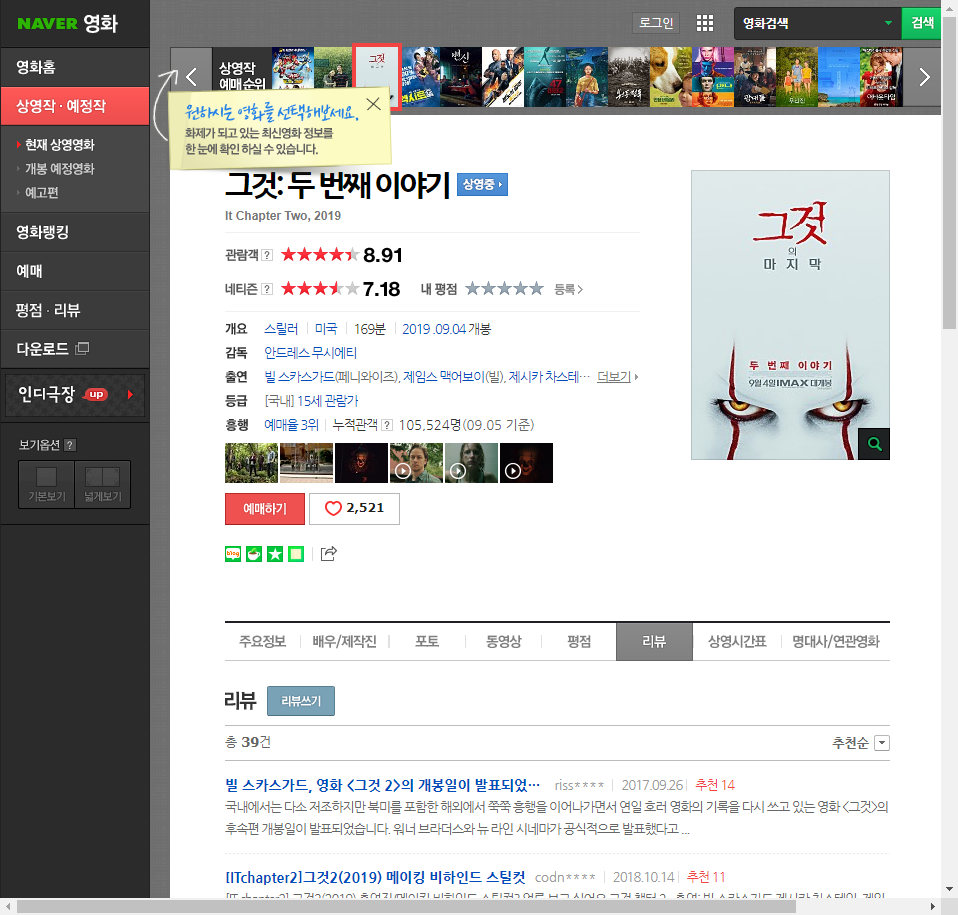

In [17]:
capture_img = './images/seleniumhq_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

# find_element_by_xpath: xml기반
# 

- 네이버 크롤링

In [19]:
# 네이버 크롤링
url_page = 'https://www.naver.com'
driver.get(url_page)

In [11]:
# XQury
driver.find_element_by_xpath('//*[@id="PM_ID_serviceNavi"]/li[6]/a').click()

# jQuery
# driver.find_element_by_css_selector('#PM_ID_serviceNavi > li:nth-child(6) > a').click()

In [12]:
# 평점&리뷰 1등 페이지로 이동
driver.find_element_by_css_selector('#review1 > div > a').click()

In [13]:
# 리뷰 클릭
driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()

In [14]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code=167560'

In [15]:
# pattern = re.compile("[\d+,?]+")
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'167560'

In [16]:
review_url = current_url.replace(code, '{}')
review_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code={}'

- 영화 리뷰 페이지로 바로 이동

In [26]:
# 영화제목 검색키 입력
movie_title = '봉오동 전투'
movie_title = '알라딘'
driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(movie_title)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ipt_tx_srch"}
  (Session info: chrome=76.0.3809.132)


In [27]:
# 검색 클릭
driver.find_element_by_css_selector('#jSearchArea > div > button').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#jSearchArea > div > button"}
  (Session info: chrome=76.0.3809.132)


In [28]:
# 검색 첫번째 페이지로 이동
driver.find_element_by_css_selector('#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a"}
  (Session info: chrome=76.0.3809.132)


In [29]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [30]:
soup.title

In [31]:
current_url = driver.current_url
current_url

'data:,'

In [32]:
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

''

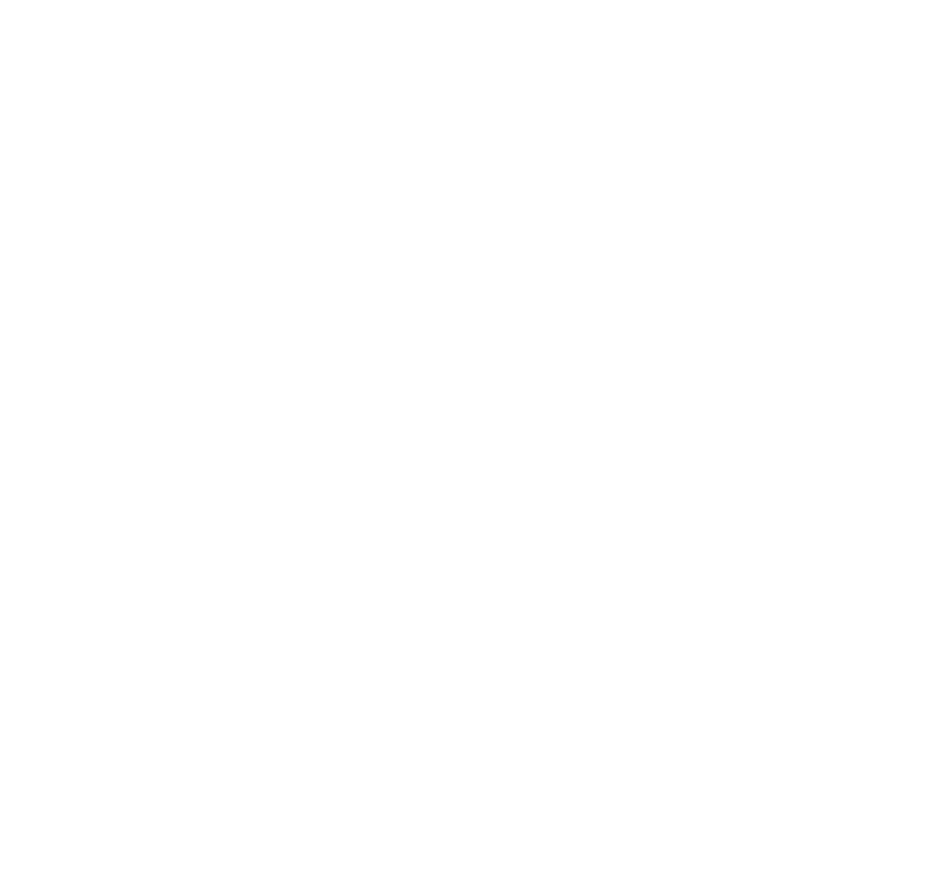

In [33]:
'163788'
# 영화메인페이지 캡처후 저장
capture_img = './images/naver_movie_{code}.png'.format(code=code)
driver.save_screenshot(capture_img)
Image(capture_img)

In [34]:
# 리뷰페이지로 바로 이동
url_page = review_url.format(code)
driver.get(url_page)

In [39]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
soup.title

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=76.0.3809.132)


In [36]:
movie_title = soup.title.get_text().split(':')[0].strip()
movie_title

AttributeError: 'NoneType' object has no attribute 'get_text'

In [37]:
review_cnt = soup.find("span","cnt")
review_cnt

In [38]:
review_cnt2 = review_cnt.find("em").get_text()
review_cnt2

AttributeError: 'NoneType' object has no attribute 'find'

In [ ]:
review_cnt_total = int(review_cnt2.replace(',', ''))
review_cnt_total

In [ ]:
last_page = review_cnt_total//10 + 1
last_page

In [ ]:
'영화 "{}"의 리뷰수는 총 {}건이며, 마지막 페이지는 {} 입니다.'.format(movie_title, review_cnt_total, last_page)

In [40]:
# 리뷰 마지막 페이지로 이동
url_page = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}'.format(code, last_page)
driver.get(url_page)

NameError: name 'last_page' is not defined